<a href="https://colab.research.google.com/github/Alex-Roberts27/Heatmap-Code/blob/main/HEATMAPmock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

In [ ]:
counts = pd.read_csv('droppednamesthreshrawcount.csv')
counts


,gene_id,Ctrl_1_RAW3,Ctrl_2_RAW3,Ctrl_3_RAW3,Inf_1_RAW3,Inf_2_RAW3,Inf_3_RAW3,Ctrl_1_RAW14,Ctrl_2_RAW14,Ctrl_3_RAW14,Inf_1_RAW14,Inf_2_RAW14,Inf_3_RAW14
0,ENSMUSG00000056071,162642,214016,169850,216982,183549,184734,154461,172891,169981,246357,167028,221064
1,ENSMUSG00000064351,135839,124116,118699,131407,154269,161513,127324,127137,125381,151601,182144,147408
2,ENSMUSG00000032484,131047,156639,127052,156216,120445,146654,114701,121980,122841,169631,106341,151392
3,ENSMUSG00000056054,127175,147815,119135,155884,131392,117080,99379,120108,108316,179141,118500,152016
4,ENSMUSG00000069516,100193,114564,96148,117199,109387,106339,80542,91608,91035,154086,104237,127101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,ENSMUSG00000025478,3,12,2,3,5,3,3,3,3,4,27,3
16406,ENSMUSG00000017007,2,6,5,3,2,2,3,7,7,5,23,5
16407,ENSMUSG00000101660,8,3,2,7,3,6,3,4,3,5,21,1
16408,ENSMUSG00000033825,5,1,1,3,6,2,1,1,3,5,32,6


In [ ]:
specific_genes = [
    'Rps29', 'Ctsd', 'Gstp1', 'Gapdh', 'H2az1', 'Vim', 'H2az2',
    'Snrpf', 'Akr1c3', 'Akr1c1', 'Snrpb', 'Eif4a1', 'Pkm', 'Rack1',
    'Tpi1', 'Akr1c2', 'Hspa8', 'Tkt', 'Ube2i', 'Aldoa'
]
missing_genes = [gene for gene in specific_genes if gene not in counts.index]
if missing_genes:
    print(f"Warning: The following genes were not found in the dataset and will not be included in the heatmap: {missing_genes}")
else:
    print("Good")

In [ ]:
counts = counts.set_index('gene_id')
counts

,Ctrl_1_RAW3,Ctrl_2_RAW3,Ctrl_3_RAW3,Inf_1_RAW3,Inf_2_RAW3,Inf_3_RAW3,Ctrl_1_RAW14,Ctrl_2_RAW14,Ctrl_3_RAW14,Inf_1_RAW14,Inf_2_RAW14,Inf_3_RAW14
gene_id,,,,,,,,,,,,
ENSMUSG00000056071,162642,214016,169850,216982,183549,184734,154461,172891,169981,246357,167028,221064
ENSMUSG00000064351,135839,124116,118699,131407,154269,161513,127324,127137,125381,151601,182144,147408
ENSMUSG00000032484,131047,156639,127052,156216,120445,146654,114701,121980,122841,169631,106341,151392
ENSMUSG00000056054,127175,147815,119135,155884,131392,117080,99379,120108,108316,179141,118500,152016
ENSMUSG00000069516,100193,114564,96148,117199,109387,106339,80542,91608,91035,154086,104237,127101
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000025478,3,12,2,3,5,3,3,3,3,4,27,3
ENSMUSG00000017007,2,6,5,3,2,2,3,7,7,5,23,5
ENSMUSG00000101660,8,3,2,7,3,6,3,4,3,5,21,1


In [ ]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Ctrl_1_RAW3,Ctrl_2_RAW3,Ctrl_3_RAW3,Inf_1_RAW3,Inf_2_RAW3,Inf_3_RAW3,Ctrl_1_RAW14,Ctrl_2_RAW14,Ctrl_3_RAW14,Inf_1_RAW14,Inf_2_RAW14,Inf_3_RAW14
gene_id,,,,,,,,,,,,
ENSMUSG00000056071,162642,214016,169850,216982,183549,184734,154461,172891,169981,246357,167028,221064
ENSMUSG00000064351,135839,124116,118699,131407,154269,161513,127324,127137,125381,151601,182144,147408
ENSMUSG00000032484,131047,156639,127052,156216,120445,146654,114701,121980,122841,169631,106341,151392
ENSMUSG00000056054,127175,147815,119135,155884,131392,117080,99379,120108,108316,179141,118500,152016
ENSMUSG00000069516,100193,114564,96148,117199,109387,106339,80542,91608,91035,154086,104237,127101
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000025478,3,12,2,3,5,3,3,3,3,4,27,3
ENSMUSG00000017007,2,6,5,3,2,2,3,7,7,5,23,5
ENSMUSG00000101660,8,3,2,7,3,6,3,4,3,5,21,1


In [ ]:
counts = counts.T
counts

gene_id,ENSMUSG00000056071,ENSMUSG00000064351,ENSMUSG00000032484,ENSMUSG00000056054,ENSMUSG00000069516,ENSMUSG00000037742,ENSMUSG00000032496,ENSMUSG00000069919,ENSMUSG00000029661,ENSMUSG00000001506,...,ENSMUSG00000040258,ENSMUSG00000103308,ENSMUSG00000026919,ENSMUSG00000076474,ENSMUSG00000101581,ENSMUSG00000025478,ENSMUSG00000017007,ENSMUSG00000101660,ENSMUSG00000033825,ENSMUSG00000070661
Ctrl_1_RAW3,162642,135839,131047,127175,100193,113438,82491,102220,68039,63533,...,6,3,5,2,3,3,2,8,5,1
Ctrl_2_RAW3,214016,124116,156639,147815,114564,105553,96262,98996,60277,56394,...,7,5,7,4,3,12,6,3,1,1
Ctrl_3_RAW3,169850,118699,127052,119135,96148,104237,81879,105341,99775,93664,...,2,1,5,5,5,2,5,2,1,2
Inf_1_RAW3,216982,131407,156216,155884,117199,112657,96627,74358,51835,49810,...,1,8,2,1,2,3,3,7,3,1
Inf_2_RAW3,183549,154269,120445,131392,109387,129049,78608,98825,69957,65260,...,6,5,23,5,8,5,2,3,6,3
Inf_3_RAW3,184734,161513,146654,117080,106339,119554,95136,83054,66643,63743,...,10,1,8,5,6,3,2,6,2,1
Ctrl_1_RAW14,154461,127324,114701,99379,80542,100281,66467,121978,52321,43705,...,1,2,4,3,6,3,3,3,1,1
Ctrl_2_RAW14,172891,127137,121980,120108,91608,106036,71887,128666,51132,42216,...,1,4,6,6,7,3,7,4,1,3
Ctrl_3_RAW14,169981,125381,122841,108316,91035,100554,79749,143533,76249,73007,...,2,3,2,6,3,3,7,3,3,2
Inf_1_RAW14,246357,151601,169631,179141,154086,103618,106516,19383,115056,129528,...,3,5,6,10,3,4,5,5,5,10


In [ ]:
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','Inf', 'Inf', 'Inf', 'C', 'C', 'C', 'Inf', 'Inf', 'Inf']),
                        columns = ['Sample', 'Condition'])

In [ ]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Ctrl_1_RAW3,C
Ctrl_2_RAW3,C
Ctrl_3_RAW3,C
Inf_1_RAW3,Inf
Inf_2_RAW3,Inf
Inf_3_RAW3,Inf
Ctrl_1_RAW14,C
Ctrl_2_RAW14,C
Ctrl_3_RAW14,C


In [ ]:
dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")


#design_factors=["batch", "condition"] = ~ batch + condtion

/tmp/ipython-input-890829369.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts,


In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 19.68 seconds.

Fitting dispersion trend curve...
... done in 0.60 seconds.

Fitting MAP dispersions...
... done in 26.47 seconds.

Fitting LFCs...
... done in 11.48 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [ ]:
dds

AnnData object with n_obs × n_vars = 12 × 16410
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [ ]:
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','C','Inf'))

In [ ]:
#ask maya about what the flipping of conditions does

In [ ]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition C vs Inf
                         baseMean  log2FoldChange     lfcSE      stat  \
gene_id                                                                 
ENSMUSG00000056071  188680.394970       -0.145552  0.139026 -1.046944   
ENSMUSG00000064351  139923.029133       -0.200746  0.083096 -2.415826   
ENSMUSG00000032484  135425.841507       -0.053881  0.142040 -0.379338   
ENSMUSG00000056054  131430.149575       -0.166590  0.154990 -1.074846   
ENSMUSG00000069516  107607.674387       -0.244067  0.140227 -1.740509   
...                           ...             ...       ...       ...   
ENSMUSG00000025478       5.928967       -0.725032  0.741964 -0.977180   
ENSMUSG00000017007       5.913954       -0.362241  0.687408 -0.526966   
ENSMUSG00000101660       5.487758       -0.830254  0.671164 -1.237037   
ENSMUSG00000033825       5.499551       -2.110703  0.827252 -2.551463   
ENSMUSG00000070661       5.036003       -2.277985  0.894116 -2.5477

... done in 5.55 seconds.



In [ ]:
res = stat_res.results_df

In [ ]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000056071,188680.394970,-0.145552,0.139026,-1.046944,0.295125,0.485867
ENSMUSG00000064351,139923.029133,-0.200746,0.083096,-2.415826,0.015700,0.084638
ENSMUSG00000032484,135425.841507,-0.053881,0.142040,-0.379338,0.704437,0.821592
ENSMUSG00000056054,131430.149575,-0.166590,0.154990,-1.074846,0.282444,0.472440
ENSMUSG00000069516,107607.674387,-0.244067,0.140227,-1.740509,0.081770,0.220063
...,...,...,...,...,...,...
ENSMUSG00000025478,5.928967,-0.725032,0.741964,-0.977180,0.328480,0.520038
ENSMUSG00000017007,5.913954,-0.362241,0.687408,-0.526966,0.598217,0.747227
ENSMUSG00000101660,5.487758,-0.830254,0.671164,-1.237037,0.216074,0.399958


In [ ]:
!pip install sanbomics

In [ ]:
from sanbomics.tools import id_map

In [ ]:
mapper = id_map(species = "mouse")
mapper.mapper

{'ENSMUSG00000064341': 'Mtnd1',
 'ENSMUSG00000064345': 'mt-Nd2',
 'ENSMUSG00000064351': 'Mtco1',
 'ENSMUSG00000064354': 'Mtco2',
 'ENSMUSG00000064356': 'Mtatp8',
 'ENSMUSG00000064357': 'Mtatp6',
 'ENSMUSG00000064358': 'mt-Co3',
 'ENSMUSG00000064360': 'mt-Nd3',
 'ENSMUSG00000065947': 'Mtnd4l',
 'ENSMUSG00000064363': 'Mtnd4',
 'ENSMUSG00000064367': 'Mtnd5',
 'ENSMUSG00000064368': 'Mtnd6',
 'ENSMUSG00000064370': 'Mt-Cyb',
 'ENSMUSG00000095742': 'CAAA01147332.1',
 'ENSMUSG00000095019': 'AC234645.1',
 'ENSMUSG00000095041': 'AC149090.1',
 'ENSMUSG00000095666': 'AC164084.2',
 'ENSMUSG00000094303': 'AC165294.1',
 'ENSMUSG00000094915': 'AC168977.2',
 'ENSMUSG00000094836': 'AC123873.3',
 'ENSMUSG00000096776': 'Vmn1r186',
 'ENSMUSG00000094722': 'AC125178.1',
 'ENSMUSG00000095250': 'AC133103.4',
 'ENSMUSG00000079800': 'A530040E14Rik',
 'ENSMUSG00000096244': 'AC102264.1',
 'ENSMUSG00000079808': 'AC168977.1',
 'ENSMUSG00000095787': 'AC133103.6',
 'ENSMUSG00000095092': 'AC125149.5',
 'ENSMUSG00000096

In [ ]:
res["Symbol"] = res.index.map(mapper.mapper)

In [ ]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000056071,188680.394970,-0.145552,0.139026,-1.046944,0.295125,0.485867,S100a9
ENSMUSG00000064351,139923.029133,-0.200746,0.083096,-2.415826,0.015700,0.084638,Mtco1
ENSMUSG00000032484,135425.841507,-0.053881,0.142040,-0.379338,0.704437,0.821592,Ngp
ENSMUSG00000056054,131430.149575,-0.166590,0.154990,-1.074846,0.282444,0.472440,S100a8
ENSMUSG00000069516,107607.674387,-0.244067,0.140227,-1.740509,0.081770,0.220063,Lyz2
...,...,...,...,...,...,...,...
ENSMUSG00000025478,5.928967,-0.725032,0.741964,-0.977180,0.328480,0.520038,Dpysl4
ENSMUSG00000017007,5.913954,-0.362241,0.687408,-0.526966,0.598217,0.747227,Rbpjl
ENSMUSG00000101660,5.487758,-0.830254,0.671164,-1.237037,0.216074,0.399958,NaN


In [ ]:
res = res[res.baseMean >= 10]

In [ ]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000056071,188680.394970,-0.145552,0.139026,-1.046944,0.295125,0.485867,S100a9
ENSMUSG00000064351,139923.029133,-0.200746,0.083096,-2.415826,0.015700,0.084638,Mtco1
ENSMUSG00000032484,135425.841507,-0.053881,0.142040,-0.379338,0.704437,0.821592,Ngp
ENSMUSG00000056054,131430.149575,-0.166590,0.154990,-1.074846,0.282444,0.472440,S100a8
ENSMUSG00000069516,107607.674387,-0.244067,0.140227,-1.740509,0.081770,0.220063,Lyz2
...,...,...,...,...,...,...,...
ENSMUSG00000034968,10.018598,-0.266168,0.411025,-0.647570,0.517263,0.685210,Lbx2
ENSMUSG00000045498,10.089505,-0.733750,0.564611,-1.299566,0.193750,0.374012,Pcdhb3
ENSMUSG00000027238,10.092589,-0.421113,0.484201,-0.869708,0.384460,0.572446,Frmd5


In [ ]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5) & (res.baseMean > 20)]

In [ ]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000047139,25851.377743,0.649338,0.234586,2.768014,0.005640,0.048445,Cd24
ENSMUSG00000026728,15949.540172,-0.534898,0.145717,-3.670804,0.000242,0.008022,Vim
ENSMUSG00000034248,13677.175917,0.855950,0.307008,2.788036,0.005303,0.047105,Slc25a37
ENSMUSG00000024164,13395.797046,-0.527630,0.128883,-4.093869,0.000042,0.002493,C3
ENSMUSG00000026043,12921.819145,-2.640723,0.684501,-3.857878,0.000114,0.004959,Col3a1
...,...,...,...,...,...,...,...
ENSMUSG00000027297,20.874490,0.960646,0.298712,3.215956,0.001300,0.021676,Ltk
ENSMUSG00000000126,20.823073,-1.018685,0.364221,-2.796887,0.005160,0.046267,Wnt9a
ENSMUSG00000108878,20.696862,0.886227,0.299825,2.955810,0.003118,0.034952,NaN


In [ ]:
#heatmap starts here

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
dds.layers["normed_counts"]

array([[1.66149176e+05, 1.38768202e+05, 1.33872869e+05, ...,
        8.17251025e+00, 5.10781890e+00, 1.02156378e+00],
       [2.19668125e+05, 1.27393882e+05, 1.60775809e+05, ...,
        3.07922948e+00, 1.02640983e+00, 1.02640983e+00],
       [1.75800434e+05, 1.22857437e+05, 1.31503072e+05, ...,
        2.07006693e+00, 1.03503347e+00, 2.07006693e+00],
       ...,
       [2.48556774e+05, 1.52954678e+05, 1.71145671e+05, ...,
        5.04464606e+00, 5.04464606e+00, 1.00892921e+01],
       [1.68671122e+05, 1.83935825e+05, 1.07387120e+05, ...,
        2.12065855e+01, 3.23147970e+01, 2.92852848e+01],
       [2.32811975e+05, 1.55241684e+05, 1.59437405e+05, ...,
        1.05314287e+00, 6.31885720e+00, 6.31885720e+00]])

In [ ]:
dds.layers["log1p"] = np.log1p(dds.layers["normed_counts"])

In [ ]:
dds.layers["log1p"]

array([[12.02064734, 11.84056742, 11.80465336, ...,  2.21621099,
         1.80956974,  0.70387136],
       [12.29987772, 11.75504685, 11.9877724 , ...,  1.40590812,
         0.70626567,  0.70626567],
       [12.07711042, 11.71878806, 11.78679309, ...,  1.12169936,
         0.71051226,  1.12169936],
       ...,
       [12.42343059, 11.93790347, 12.05027619, ...,  1.79917293,
         1.79917293,  2.40597997],
       [12.03571201, 12.12234763, 11.58420484, ...,  3.10038889,
         3.50600165,  3.41066194],
       [12.35799073, 11.95274487, 11.97941295, ...,  0.71937172,
         1.99045419,  1.99045419]])

In [ ]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
gene_id,,,,,,,
ENSMUSG00000047139,25851.377743,0.649338,0.234586,2.768014,0.005640,0.048445,Cd24
ENSMUSG00000026728,15949.540172,-0.534898,0.145717,-3.670804,0.000242,0.008022,Vim
ENSMUSG00000034248,13677.175917,0.855950,0.307008,2.788036,0.005303,0.047105,Slc25a37
ENSMUSG00000024164,13395.797046,-0.527630,0.128883,-4.093869,0.000042,0.002493,C3
ENSMUSG00000026043,12921.819145,-2.640723,0.684501,-3.857878,0.000114,0.004959,Col3a1
...,...,...,...,...,...,...,...
ENSMUSG00000027297,20.874490,0.960646,0.298712,3.215956,0.001300,0.021676,Ltk
ENSMUSG00000000126,20.823073,-1.018685,0.364221,-2.796887,0.005160,0.046267,Wnt9a
ENSMUSG00000108878,20.696862,0.886227,0.299825,2.955810,0.003118,0.034952,NaN


In [ ]:
dds_sigs = dds[:,sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 12 × 965
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [ ]:
grapher = pd.DataFrame(dds_sigs.layers["log1p"].T, index=dds_sigs.var_names, columns=dds_sigs.obs_names)

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


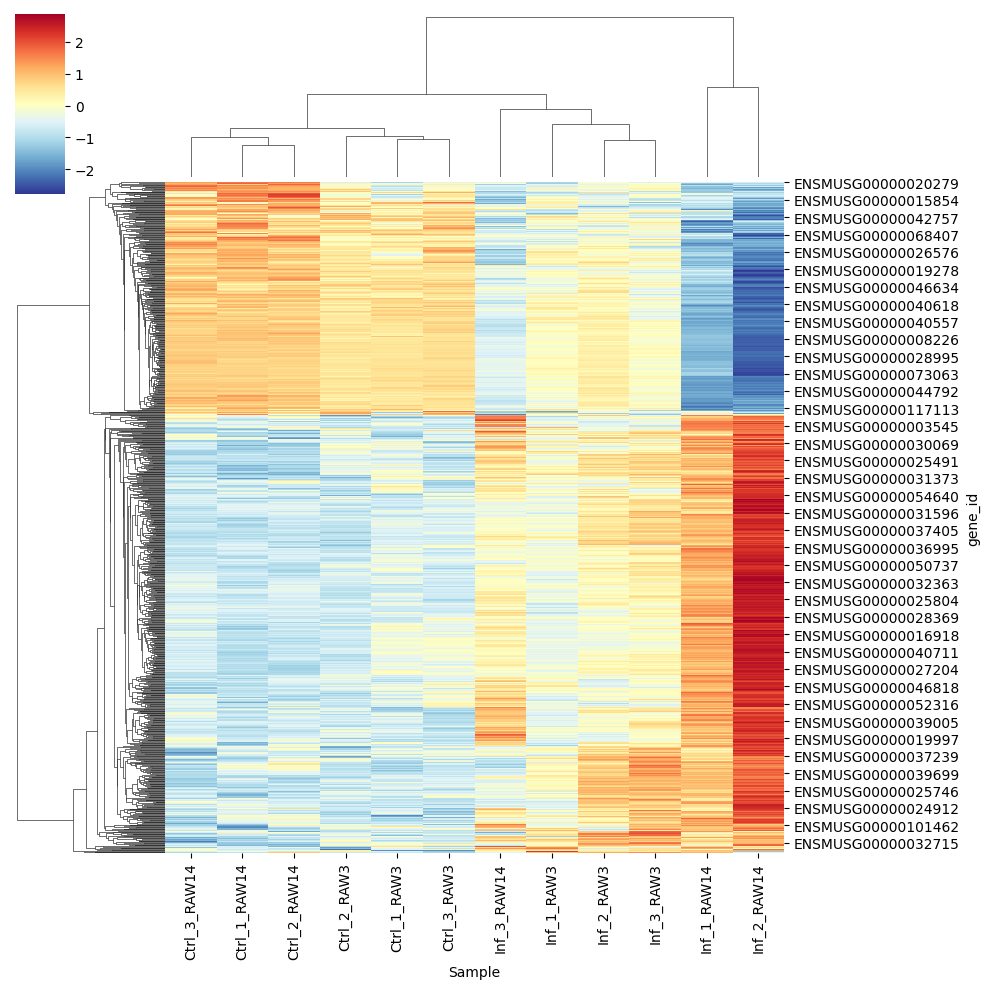

In [ ]:
sns.clustermap(grapher, z_score=0, cmap = "RdYlBu_r")

In [ ]:
grapher.index = grapher.index.map(mapper.mapper)

In [ ]:
grapher
grapher.to_csv('heatmap.csv')

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


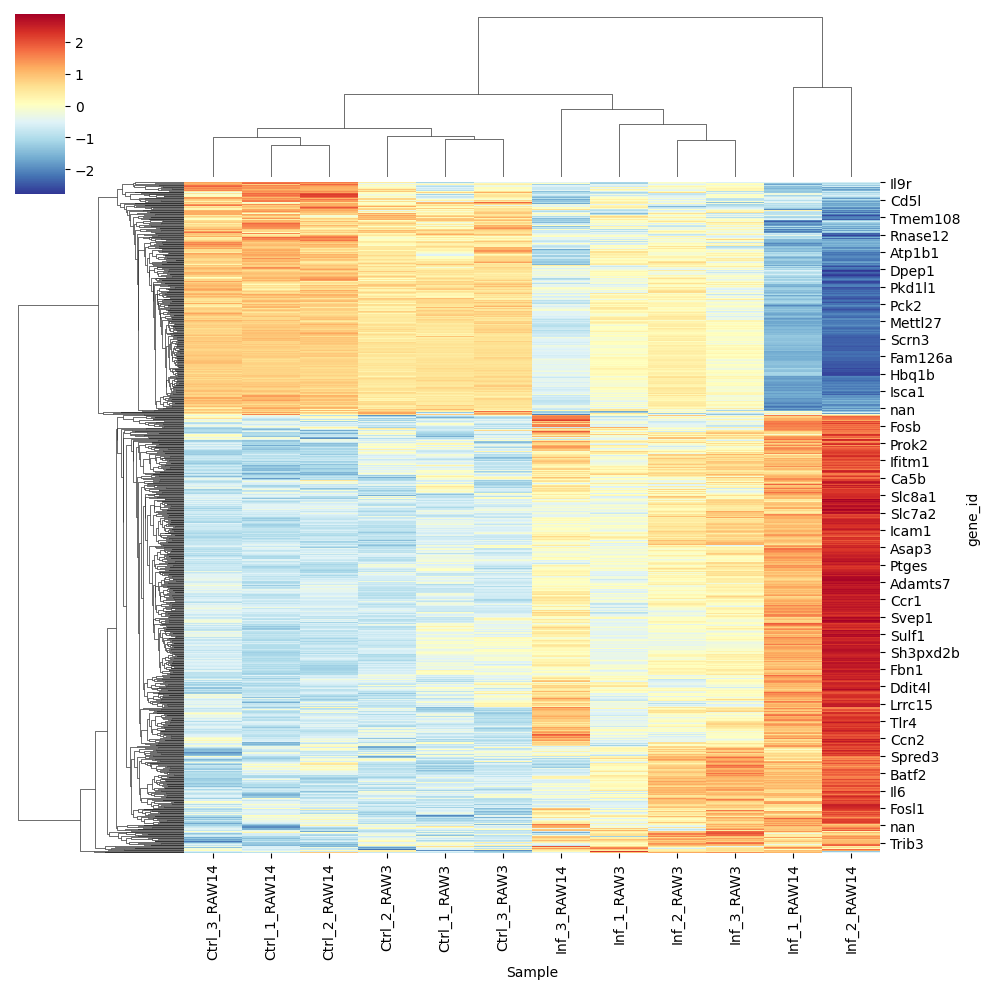

In [ ]:
ax = sns.clustermap(grapher, z_score=0, cmap = "RdYlBu_r", figsize=(10,10))

In [ ]:
##code below doesn't change anything so its useless

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


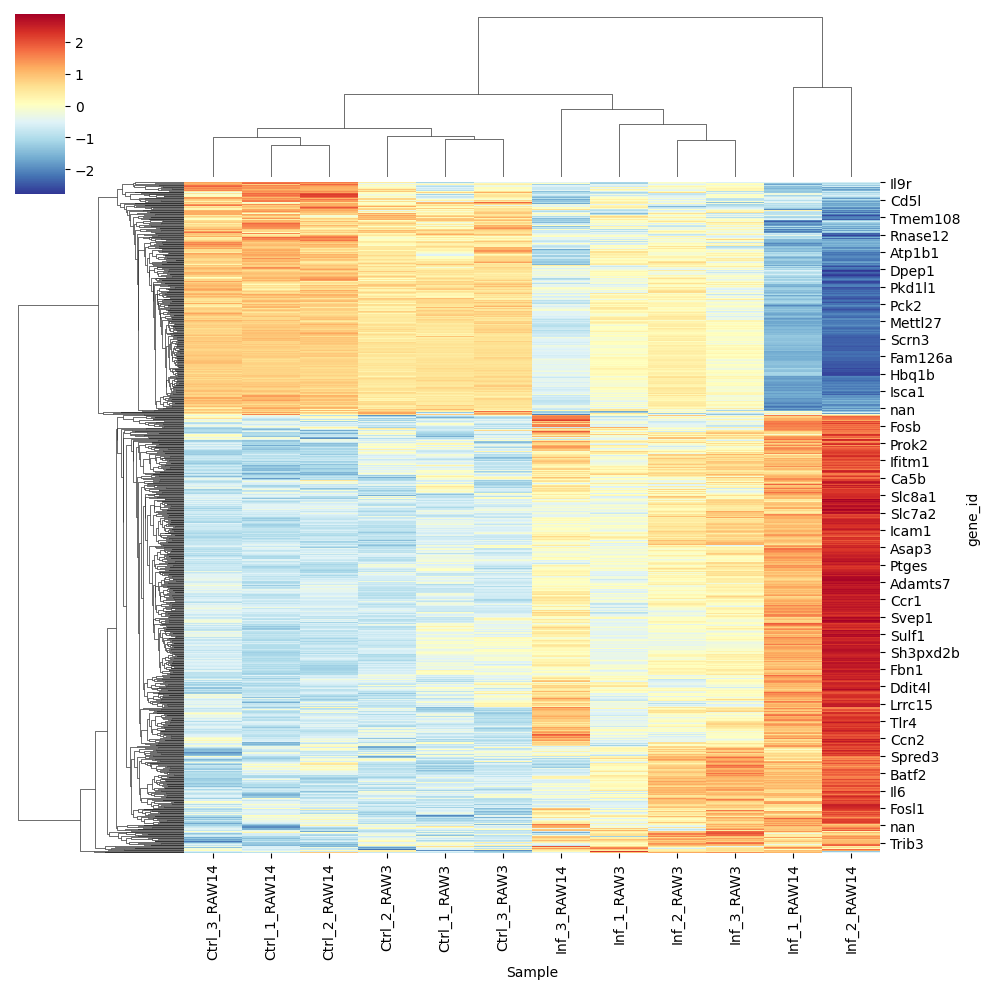

In [ ]:
import matplotlib.pyplot as plt

# Get the desired order of samples based on the 'Condition' in metadata
# 'C' for Control will come before 'Inf' for Infected alphabetically
ordered_samples = metadata.sort_values(by='Condition').index

# Reindex the grapher DataFrame with the new order
grapher_ordered = grapher[ordered_samples]

# Plot the clustermap with the reordered data
ax = sns.clustermap(grapher_ordered, z_score=0, cmap='RdYlBu_r', figsize=(10,10))
plt.show()